<h4 class="text-center"> Arbitary Imputation </h4>

* If the values on the dataset are not randomly distributed we can use arbitary imputation
* Most Used Arbitary value (0, 999,-999 or other 9s combination) or -1 if the distribution is positive
* Sometimes we don't want to put values on missing observation instead we want to flag them with some different arbitary values
* So that we can understand that this values are missing data

##### Library

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set1')

##### Loading the data

In [3]:
raw_data = pd.read_csv('data/titanic_train.csv',usecols=['age','fare','survived'])

In [4]:
raw_data.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


##### Train Test Split Before Imputation

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
featured_data = raw_data.drop('survived',axis=1)
target_data = raw_data['survived']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(featured_data,target_data,test_size=0.2,random_state=42)

In [23]:
x_train.shape, y_train.shape

((680, 2), (680,))

In [24]:
x_test.shape, y_test.shape

((170, 2), (170,))

In [10]:
#### Missing data(Percentage)

In [11]:
featured_data.isnull().mean()


age     0.204706
fare    0.001176
dtype: float64

In [12]:
x_train.isnull().mean()

age     0.207353
fare    0.001471
dtype: float64

In [13]:
#### Creating a formula to automate imputation

In [14]:
def impute_data(data,column,value):
    return data[column].fillna(value)

In [15]:
#### Data Distribution Before Imputation

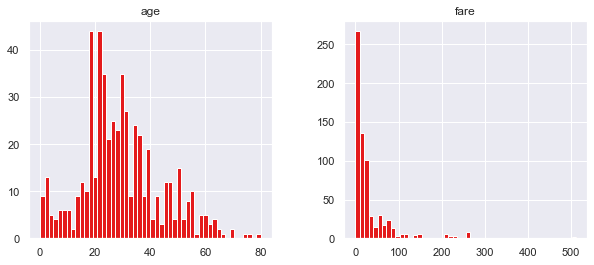

In [16]:

x_train.hist(figsize=(10,4),bins=50)
plt.show()

<span class="badge"> Impute </span>

##### Imputing with two different arbitary values

In [18]:
# 99
# As ['Age'] can't be negative we can use (-1)

In [26]:
#Replacing with 99
x2_train = x_train.copy()
x2_train['age_99'] = impute_data(x_train,'age',99)

In [28]:
x2_train.head()

,age,fare,age_99
332,18.0,7.7750,18.0
383,58.0,146.5208,58.0
281,29.0,21.0750,29.0
2,30.0,24.1500,30.0
231,47.0,227.5250,47.0


In [29]:
## Replacing with -1
x2_train['age_minus'] = impute_data(x2_train,'age',-1)

In [30]:
x2_train.head(20)

,age,fare,age_99,age_minus
332,18.0,7.7750,18.0,18.0
383,58.0,146.5208,58.0,58.0
281,29.0,21.0750,29.0,29.0
2,30.0,24.1500,30.0,30.0
231,47.0,227.5250,47.0,47.0
457,18.0,17.8000,18.0,18.0
215,28.5,7.2292,28.5,28.5
210,NaN,7.8958,99.0,-1.0
657,25.0,41.5792,25.0,25.0
715,22.0,12.2875,22.0,22.0


<span class="badge"> Variance </span>

In [31]:
x2_train['age'].var()

212.76707662344668

In [32]:
x2_train['age_99'].var()

963.3238743755321

In [33]:
x2_train['age_minus'].var()

321.8428902292956

In [37]:
pd.DataFrame([x2_train['age'].var(),x2_train['age_99'].var(),x2_train['age_minus'].var()],index=['age','age99','age1']).T

,age,age99,age1
0,212.767077,963.323874,321.84289


<span class="badge"> KDE PLOT </span>

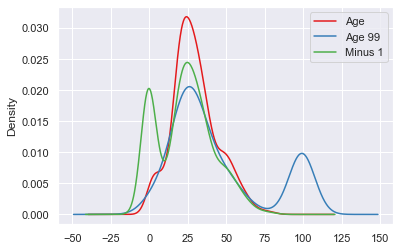

In [40]:
x2_train['age'].plot(kind='kde',label='Age');
x2_train['age_99'].plot(kind='kde',label='Age 99');
x2_train['age_minus'].plot(kind='kde',label='Minus 1');
plt.legend();

In [41]:
#We can see it's distrot the distribution . Normally Arbitary distribution is not good for linear model
#As linear model works well with normal distribution
#but it's good with random forest

<h4 class="text-center"> End Distributin </h4> 

* Arbitary distribution is kind of tedious as there is no certain arbitary number that we can use 
* So we Use to End Distribution Imputation

* If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation
* If the variable is skewed, we can use the IQR proximity rule

In [61]:
#method 1 (as in our dataset ['age'] values are normally distributed)
x_train.age.mean() + 3 * x_train.age.std()

73.27352719631584

In [62]:
# Method 2 if the values are not normally distributed
# IQR
# IQR = X_train['column'].quantile(0.75) - X_train['column'].quantile(
#     0.25)

# # calculate the upper boundary
# extreme_value = X_train['column'].quantile(0.75) + 3 * IQR

# extreme_value

In [63]:
x2_train['Age_End'] = impute_data(x2_train,'age',x_train.age.mean() + 3 * x_train.age.std())

In [66]:
x2_train['Age_End'] =  np.round(x2_train['Age_End'],1)

In [67]:
x2_train.head()

,age,fare,age_99,age_minus,Age_End
332,18.0,7.7750,18.0,18.0,18.0
383,58.0,146.5208,58.0,58.0,58.0
281,29.0,21.0750,29.0,29.0,29.0
2,30.0,24.1500,30.0,30.0,30.0
231,47.0,227.5250,47.0,47.0,47.0


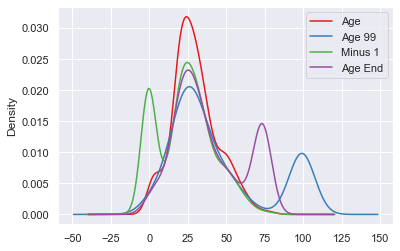

In [68]:
x2_train['age'].plot(kind='kde',label='Age');
x2_train['age_99'].plot(kind='kde',label='Age 99');
x2_train['age_minus'].plot(kind='kde',label='Minus 1');
x2_train['Age_End'].plot(kind='kde',label='Age End');
plt.legend();